In [47]:
## Import relevant libraries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
from utils.logo import add_logo
import os

In [49]:
## Set colors and pull raw data

In [50]:
# For colors
color_palette = {'Hyperliquid':'#09b882', 'Bold Blue':'#1f1f60', 'Sky Blue':'#6f85ee', 'Engage Orange':'#eda024', 'Dark Slate':'#262935', 'Mauve':'#7c1158', 'Yellow':'#ebdc78', 'Green':'#00b7c7', 'Red':'#b30000','Mid Grey':'#54504c','Other Grey':'#a4a2a8', 'blue 1':'#03045e', 'blue 2':'#0077b6', 'blue 3':'#00b4d8', 'blue 4':'#90e0ef', 'blue 5':'#caf0f8'}
platform_colors = {
        'Hyperliquid': color_palette['Hyperliquid'],  
        'Jupiter': color_palette['Bold Blue'],      
        'dYdX v4': color_palette['Sky Blue'],      
        'ApeX': color_palette['Engage Orange'],         
        'Holdstation': color_palette['Yellow'],  
        'Vertex Protocol': color_palette['Green'], 
        'GMX': color_palette['Red'],          
        'dYdX v3': color_palette['Dark Slate'],      
        'Drift Protocol': color_palette['Mauve'],
        'RabbitX': color_palette['Mid Grey'],           
        'Other': color_palette['Other Grey'],
        '$PURR': color_palette['blue 1'],      
        '$HFUN': color_palette['blue 2'],
        '$JEFF': color_palette['blue 3'],
        '$RAGE': color_palette['blue 4'],
        '$POINTS': color_palette['blue 5'],
        'Perps': color_palette['Bold Blue'],      
        'Spot': color_palette['Sky Blue'],
    }

# For importing raw data
base_folder = 'raw-data'

In [51]:
## Chart 1: Monthly Perps Volume Market Share (TTM)

In [52]:
# Chart 1 code

# Define filepaths
data_file = 'Perpetuals - Perpetual Trading Volumes_Artemis-Raw-Data.csv'
input_file = os.path.join(base_folder, data_file)

# Function to generate the 100% stacked bar chart
def plot_perpetual_volumes(file_path):
    # Step 1: Load the dataset
    data = pd.read_csv(file_path)

    # Step 2: Convert the "Date" column to datetime format
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
    
    # Step 3: Set variable for the last value in the date column
    last_date = data['Date'].iloc[-1].strftime('%m/%d/%y')
    
    # Step 4: Filter the data from 1st January 2024 onwards
    data = data[data['Date'] >= '2023-09-01']

    # Step 5: Resample the data to monthly frequency and sum the volumes (using 'ME' for month-end)
    monthly_data = data.set_index('Date').resample('ME').sum()

    # Step 6: Select columns and reorder them based on the specified list
    columns_order = [
        'Hyperliquid', 'Jupiter', 'dYdX v4', 'ApeX', 'Holdstation', 
        'Vertex Protocol', 'GMX', 'dYdX v3', 'Drift Protocol', 
        'RabbitX'
    ]

    # Step 7: Create an "Other" category by summing the rest of the columns
    other_columns = [col for col in monthly_data.columns if col not in columns_order]
    monthly_data['Other'] = monthly_data[other_columns].sum(axis=1)

    # Step 8: Keep only the desired columns plus the "Other" column
    monthly_data = monthly_data[columns_order + ['Other']]

    # Step 9: Normalize the data to percentages (100% stacked)
    monthly_data_percentage = monthly_data.div(monthly_data.sum(axis=1), axis=0) * 100

    # Step 10: Modify the x-axis to show "Month-Year"
    monthly_data_percentage.index = monthly_data_percentage.index.strftime('%b-%Y')

    # Step 11: Create the 100% stacked bar chart using matplotlib
    fig, ax = plt.subplots(figsize=(12, 8))

    # Extract the color list from the color dictionary
    color_list = [platform_colors[col] for col in monthly_data_percentage.columns]
    
    # Plotting the 100% stacked bar chart with custom colors
    monthly_data_percentage.plot(kind='bar', stacked=True, ax=ax, color=color_list)

    # Setting labels and title
    ax.set_xlabel('')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_title('Monthly Perps Volume Market Share (TTM)')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add logo without specifying a path (default will be used)
    add_logo(ax)
    
    # Add sources and note
    other_platforms_alphabetized = sorted(other_columns)
    if len(other_platforms_alphabetized) > 1:
        other_platforms_display = ', '.join(other_platforms_alphabetized[:-1]) + f", and {other_platforms_alphabetized[-1]}"
    else:
        other_platforms_display = other_platforms_alphabetized[0]
        
    text_box = ax.text(-0.6, -30, f"Source: Artemis\nNote: 'Other' includes {other_platforms_display}.\nData as of {last_date}.", 
                    bbox=dict(facecolor='white', alpha=0), fontstyle='italic')

    # Display the plot
    plt.legend(title='Key', bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

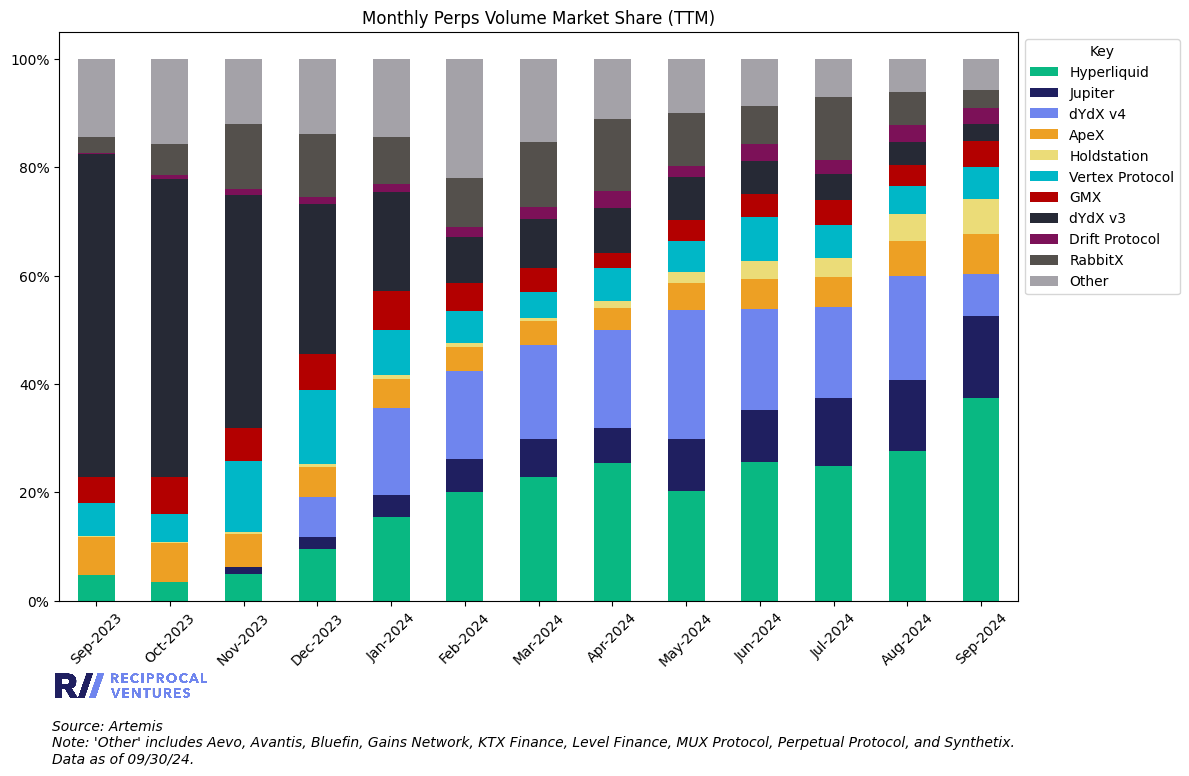

In [53]:
# Chart 1 chart
plot_perpetual_volumes(input_file)

In [54]:
## Chart 2: Hyperliquid Strict List Spot Market Cap (ITD)

In [55]:
# Chart 2 code

#Note: for the $RAGE market cap figure, I multiplied daily price from coingecko by 34,979,353, the circulating supply of $RAGE on 10/1/24 according to the token contract

# Define filepaths
data_file = 'Strict List Spot Market Cap_CoinGecko-Raw-Data.csv'
input_file = os.path.join(base_folder, data_file)


# Import colors
color_palette = {'blue 1':'#03045e', 'blue 2':'#0077b6', 'blue 3':'#00b4d8', 'blue 4':'#90e0ef', 'blue 5':'#caf0f8'}

# Function to generate the stacked area chart
def plot_Hyperliquid_transactions(file_path):
    # Step 1: Load the dataset
    data = pd.read_csv(file_path)

    # Step 2: Convert the "Date" column to datetime format
    data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
    
    # Step 3: Set variable for the last value in the date column
    last_date = data['Date'].iloc[-1].strftime('%m/%d/%y')
    
    # Step 4: Filter the data from June 2024 onwards
    data = data[data['Date'] >= '2024-06-05']

    # Step 5: Set the 'Date' column as the index (Keep it as datetime)
    data.set_index('Date', inplace=True)
    
    # Step 6: Select columns and reorder them based on the specified list
    columns_order = [
        '$PURR', '$HFUN', '$JEFF', '$RAGE', '$POINTS'
    ]
    data = data[columns_order]

    # Step 7: Create the stacked area chart using matplotlib
    fig, ax = plt.subplots(figsize=(12, 8))

    # Extract the color list from the color dictionary
    color_list = [platform_colors[col] for col in data.columns]
    
    # Plotting the stacked area chart with custom colors
    data.plot(kind='area', stacked=True, ax=ax, color=color_list, legend=True)

    # Setting labels and title
    ax.set_xlabel('')
    ax.set_title('Hyperliquid Strict List Spot Market Cap (ITD)')

    # Define a function to format the y-axis with commas
    def comma_formatter(x, pos):
        return f'{int(x):,}'
    
    # Apply the formatter to the y-axis
    ax.yaxis.set_major_formatter(FuncFormatter(comma_formatter))

    # Set custom x-axis labels on specific dates (Keep index as datetime)
    specific_dates = [ 
        '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30'
    ]
    specific_dates = pd.to_datetime(specific_dates)
    
    # Define a function to format the y-axis with commas
    def dollar_formatter(y, pos):
        return f'${int(y):,}'
    
    # Apply the formatter to the y-axis
    ax.yaxis.set_major_formatter(FuncFormatter(dollar_formatter))

    # Set x-axis ticks to only show the specified dates
    ax.set_xticks(specific_dates)
    ax.minorticks_off()
    ax.set_xticklabels([date.strftime('%b-%y') for date in specific_dates], rotation=45)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add logo without specifying a path (default will be used)
    add_logo(ax)
    
    # Adjust text box location (e.g., position it in the lower-left corner)
    text_box = ax.text(0, -0.3, f"Source: CoinGecko\nNote: Data irrelgularities in May and June likely due to data collection issues by CoinGecko.\n$RAGE market cap calculated as price multipied by the circulating supply on 10/1/24.\nData as of {last_date}.",
                       transform=ax.transAxes, fontsize=10,
                       bbox=dict(facecolor='white', alpha=0), fontstyle='italic')

    # Display the plot
    plt.legend(title='Key', bbox_to_anchor=(.5, -0.105), loc='upper center',ncol=5)
    plt.tight_layout()
    plt.show()

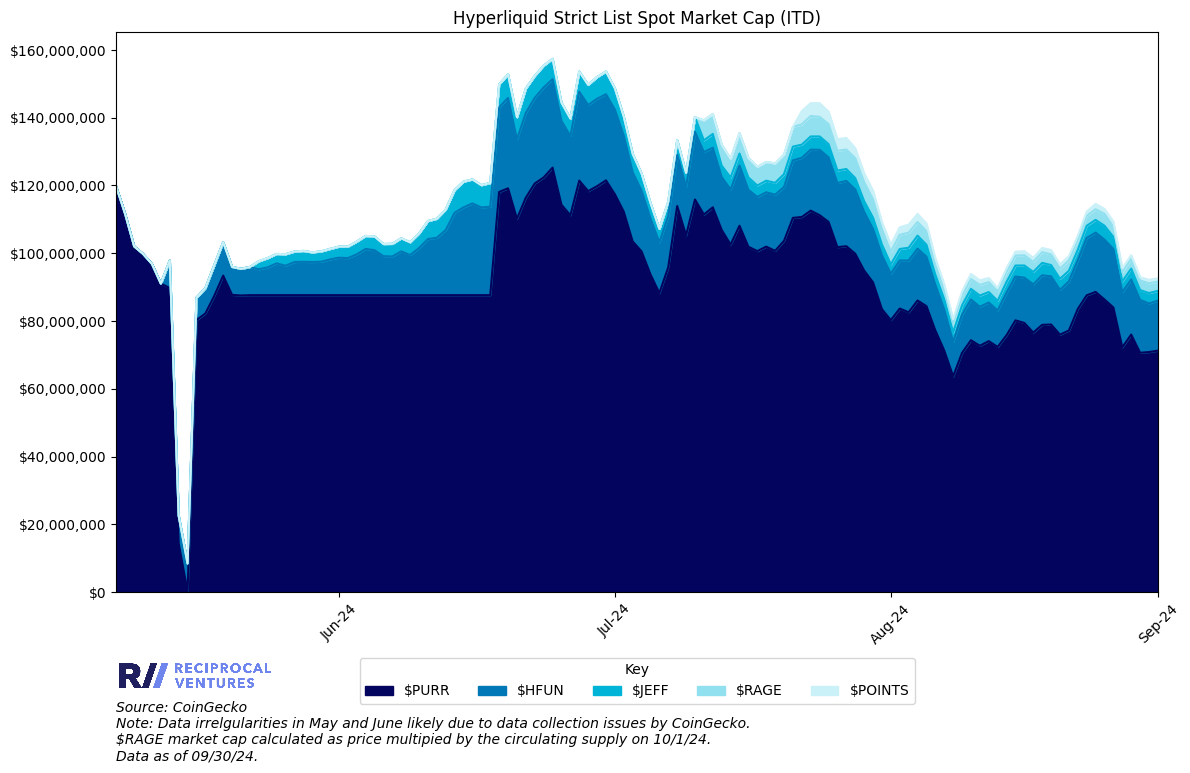

In [56]:
# Chart 2 chart
plot_Hyperliquid_transactions(input_file)

In [57]:
## Chart 3: Daily Unique User Count (TTM)

In [63]:
# Chart 3 code

# Define filepaths
data_file = 'Perpetuals - Perpetual Unique Users_Artemis-Raw-Data.csv'
input_file = os.path.join(base_folder, data_file)

# Function to generate the stacked area chart
def plot_unique_users(file_path):
    # Step 1: Load the dataset
    data = pd.read_csv(file_path)

    # Step 2: Convert the "Date" column to datetime format
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
    
    # Step 3: Set variable for the last value in the date column
    last_date = data['Date'].iloc[-1].strftime('%m/%d/%y')

    # Step 4: Filter the data from 1st September 2024 onwards
    data = data[data['Date'] >= '2023-09-01']

    # Step 5: Select columns and reorder them based on the specified list
    columns_order = ['Hyperliquid', 'Jupiter', 'Holdstation', 'GMX', 'dYdX v4', 'dYdX v3']

    # Step 6: Create an "Other" category by summing the rest of the columns
    other_columns = [col for col in data.columns if col not in columns_order and col != 'Date']
    data['Other'] = data[other_columns].sum(axis=1)

    # Step 7: Keep only the desired columns plus the "Other" column
    data = data[['Date'] + columns_order + ['Other']]

    # Step 8: Set the 'Date' column as the index
    data.set_index('Date', inplace=True)

    # Step 9: Create the stacked area chart using matplotlib
    fig, ax = plt.subplots(figsize=(12, 8))

    # Extract the color list from the color dictionary
    color_list = [platform_colors[col] for col in data.columns if col != 'Date']
    
    # Plotting the stacked area chart with custom colors
    data.plot(kind='area', stacked=True, ax=ax, color=color_list)

    # Setting labels and title
    ax.set_xlabel('')
    ax.set_title('Daily Unique User Count (TTM)')
    
    # Set custom x-axis labels on specific dates (Keep index as datetime)
    specific_dates = [
        '2023-09-30','2023-10-31','2023-11-30','2023-12-31','2024-01-31', 
        '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30', 
        '2024-07-31', '2024-08-31'
    ]
    specific_dates = pd.to_datetime(specific_dates)

    # Define a function to format the y-axis with commas
    def comma_formatter(x, pos):
        return f'{int(x):,}'

    # Apply the formatter to the y-axis
    ax.yaxis.set_major_formatter(FuncFormatter(comma_formatter))

    # Set x-axis ticks to only show the specified dates
    ax.set_xticks(specific_dates)
    ax.minorticks_off()
    ax.set_xticklabels([date.strftime('%b-%y') for date in specific_dates], rotation=45)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add logo without specifying a path (default will be used)
    add_logo(ax)
    
    # Add sources and note
    other_platforms_alphabetized = sorted(other_columns)
    if len(other_platforms_alphabetized) > 1:
        other_platforms_display = ', '.join(other_platforms_alphabetized[:-1]) + f", and {other_platforms_alphabetized[-1]}"
    else:
        other_platforms_display = other_platforms_alphabetized[0]

    # Adjust text box location (e.g., position it in the lower-left corner)
    text_box = ax.text(0, -0.4, f"Source: Artemis\nNote: 'Other' includes {other_platforms_display}.\nData as of {last_date}.",
                       transform=ax.transAxes, fontsize=10,
                       bbox=dict(facecolor='white', alpha=0), fontstyle='italic')

    # Adjust the legend positioning to make it fit within the plot area
    plt.legend(title='Platforms', bbox_to_anchor=(0.5, -0.15), loc='upper center',ncol=4)

    # Ensure the layout adapts to fit all elements (legend, text, etc.)
    plt.tight_layout()
    plt.show()

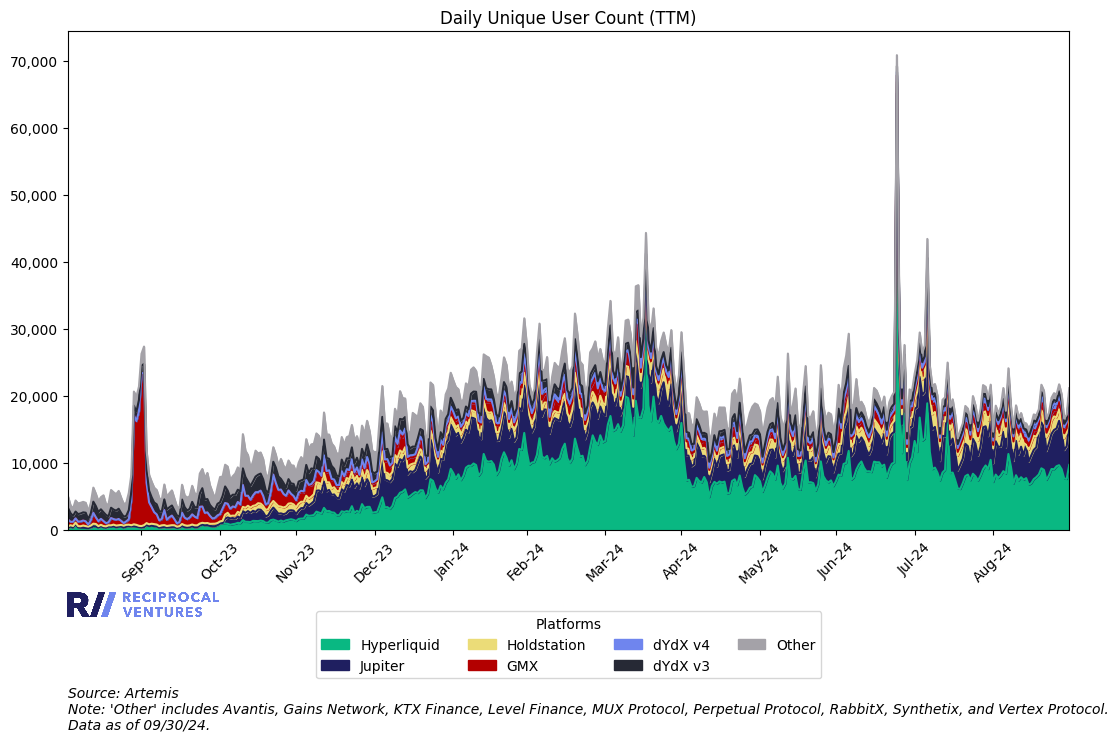

In [64]:
# Chart 3 chart
plot_unique_users(input_file)

In [58]:
## Chart 4: Hyperliquid TVL (ITD)

In [59]:
# Chart 4 code
# Define filepaths
data_file = 'Hyperliquid - TVL_Defillama-Raw-Data.csv'
input_file = os.path.join(base_folder, data_file)

# Function to generate the stacked area chart
def plot_Hyperliquid_transactions(file_path):
    # Step 1: Load the dataset
    data = pd.read_csv(file_path)

    # Step 2: Convert the "Date" column to datetime format
    data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
    
    # Step 3: Set variable for the last value in the date column
    last_date = data['Date'].iloc[-1].strftime('%m/%d/%y')

    # Step 4: Set the 'Date' column as the index (Keep it as datetime)
    data.set_index('Date', inplace=True)
    
    # Step 5: Select columns and reorder them based on the specified list
    columns_order = [
        'Perps', 'Spot'
    ]
    data = data[columns_order]
    
    # Step 6: Create the stacked area chart using matplotlib
    fig, ax = plt.subplots(figsize=(12, 8))

    # Extract the color list from the color dictionary
    color_list = [platform_colors[col] for col in data.columns]
    
    # Plotting the stacked area chart with custom colors
    data.plot(kind='area', stacked=True, ax=ax, color=color_list, legend=True)

    # Setting labels and title
    ax.set_xlabel('')
    ax.set_title('Hyperliquid TVL (ITD)')

    # Define a function to format the y-axis with commas
    def comma_formatter(x, pos):
        return f'{int(x):,}'
    
    # Apply the formatter to the y-axis
    ax.yaxis.set_major_formatter(FuncFormatter(comma_formatter))

    # Set custom x-axis labels on specific dates (Keep index as datetime)
    specific_dates = [
        '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31','2023-09-30','2023-10-31','2023-11-30','2023-12-31','2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30', 
        '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30'
    ]
    specific_dates = pd.to_datetime(specific_dates)
    
    # Define a function to format the y-axis with commas
    def dollar_formatter(y, pos):
        return f'${int(y):,}'
    
    # Apply the formatter to the y-axis
    ax.yaxis.set_major_formatter(FuncFormatter(dollar_formatter))

    # Set x-axis ticks to only show the specified dates
    ax.set_xticks(specific_dates)
    ax.minorticks_off()
    ax.set_xticklabels([date.strftime('%b-%y') for date in specific_dates], rotation=45)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add logo without specifying a path (default will be used)
    add_logo(ax)
    
    # Adjust text box location (e.g., position it in the lower-left corner)
    text_box = ax.text(0, -0.2, f"Source: DefiLlama/nNote: Data as of {last_date}.",
                       transform=ax.transAxes, fontsize=10,
                       bbox=dict(facecolor='white', alpha=0), fontstyle='italic')

    # Display the plot
    plt.legend(title='Key', bbox_to_anchor=(.5, -0.105), loc='upper center',ncol=2)
    plt.tight_layout()
    plt.show()


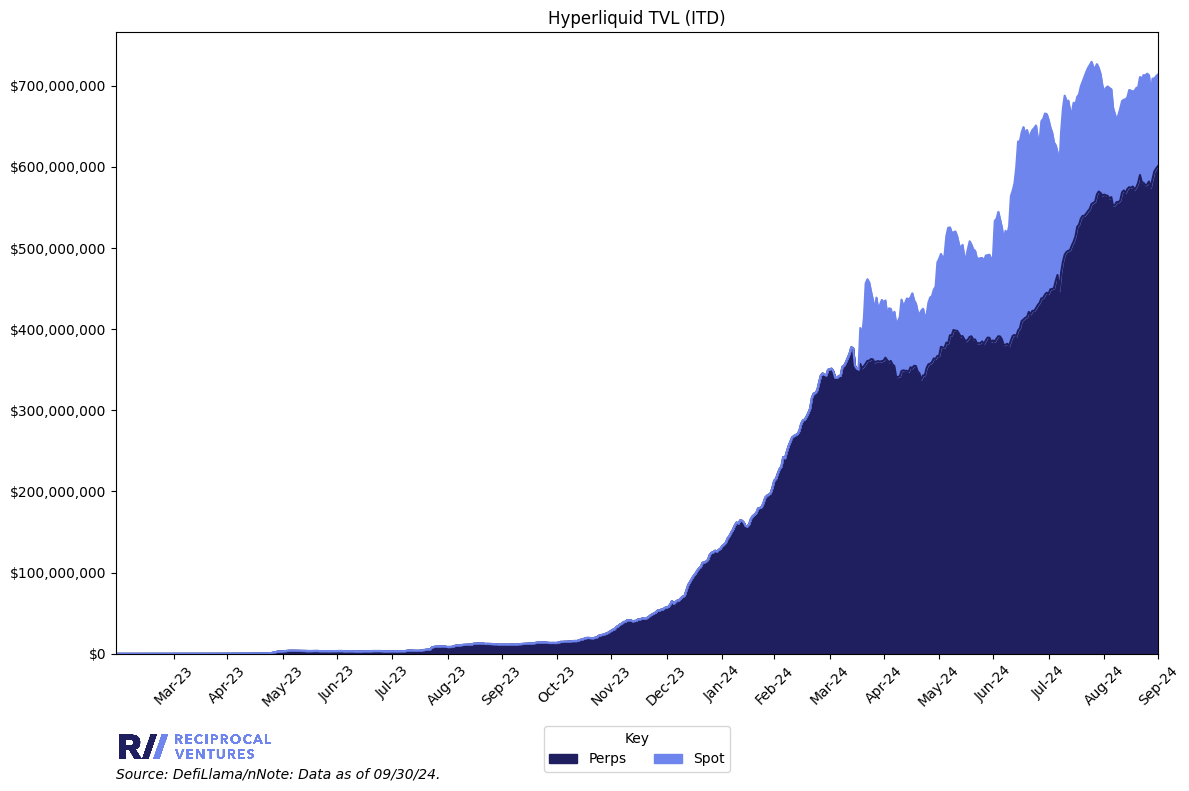

In [60]:
# Chart 4 chart

# Example usage
plot_Hyperliquid_transactions(input_file)